In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
type(mnist)

sklearn.utils._bunch.Bunch

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
type(mnist.data)

pandas.core.frame.DataFrame

In [9]:
mnist.data.value_counts()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  pixel16  pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  pixel32  pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  pixel40  pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  pixel48  pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  pixel56  pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  pixel64  pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  pixel72  pixel73  pixel74  pixel75  pixel76  pixel77  pixel78  pixel79  pixel80  pixel81  pixel82  pixel83  pixel84  pixel85  pixel86  pixel87  pixel88  pixel89  pixel90  pixel91  pixel92  pixel93  pixel94  pixel95  pixel96  pixel97  pixel98  pixel99  pixel100  pixel101  pixel102  pixel103  pixel104  pixel105  pixel106  pixel107  pixel108  pixel109  pixel110  pixel111

In [13]:
mnist.data.pixel400.max()

255.0

In [15]:
type(mnist.target)

pandas.core.series.Series

In [24]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [16]:
mnist.target.value_counts()

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

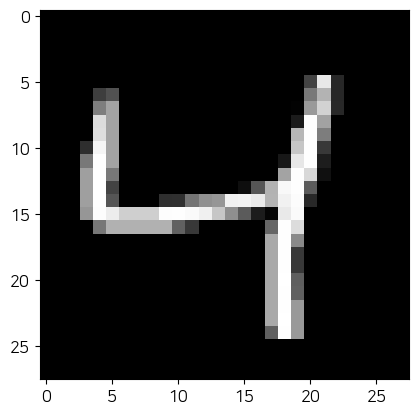

In [26]:
import matplotlib.pyplot as plt
img = mnist.data.values[2].reshape(28,28)
plt.imshow(img,cmap='gray')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(mnist.data,mnist.target,test_size=0.1)

In [29]:
X_train.shape

(63000, 784)

In [30]:
y_train.value_counts()

class
1    7125
7    6531
3    6382
2    6318
9    6270
0    6216
6    6189
8    6166
4    6118
5    5685
Name: count, dtype: int64

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [32]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9728571428571429

In [42]:
import glob
from PIL import Image
import numpy as np

['0']


C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


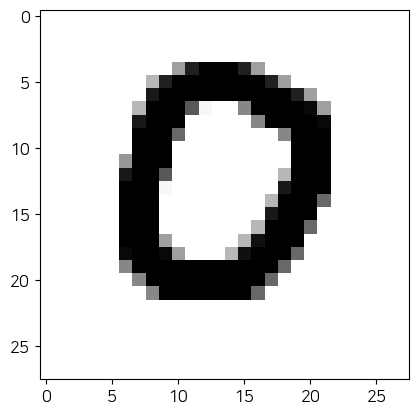

['1']


C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


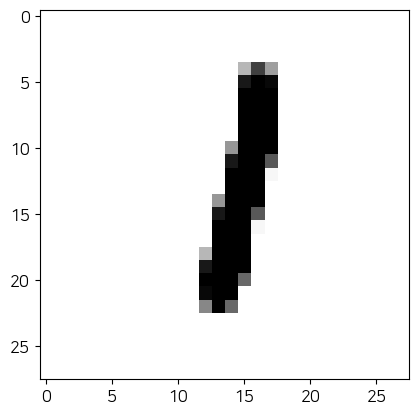

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['2']


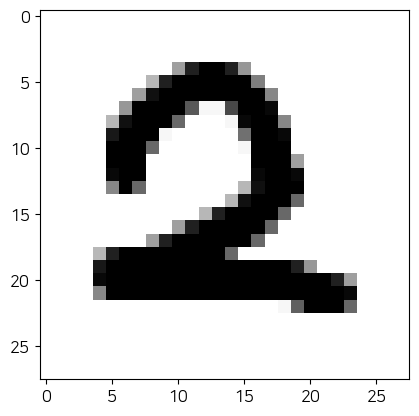

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['3']


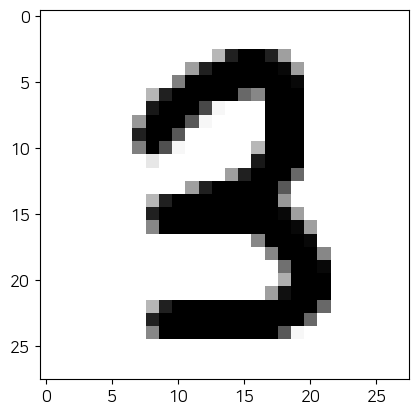

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['4']


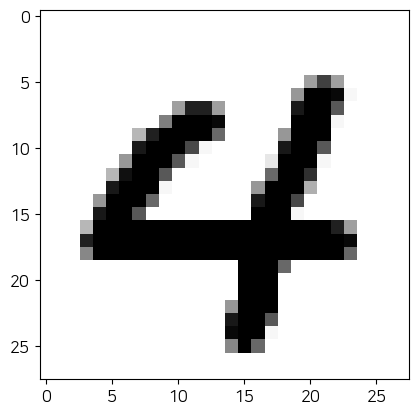

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['5']


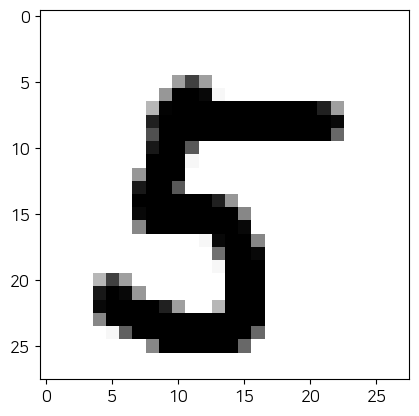

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['5']


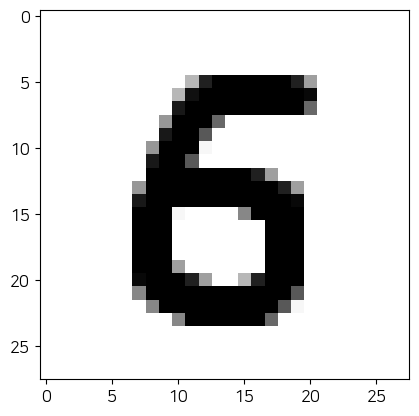

['7']


C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


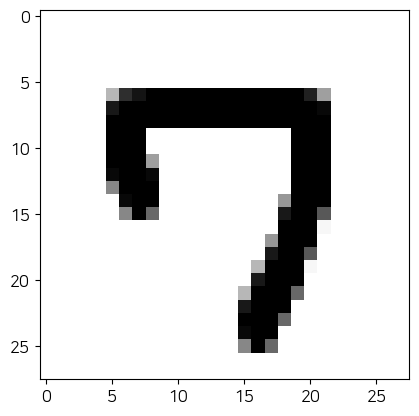

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['3']


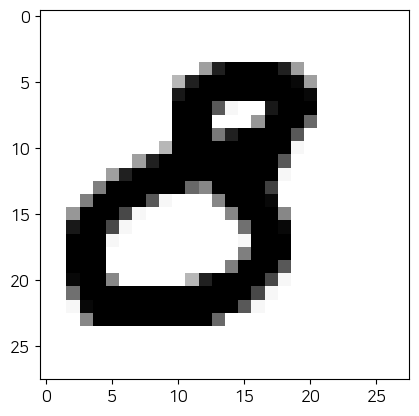

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['3']


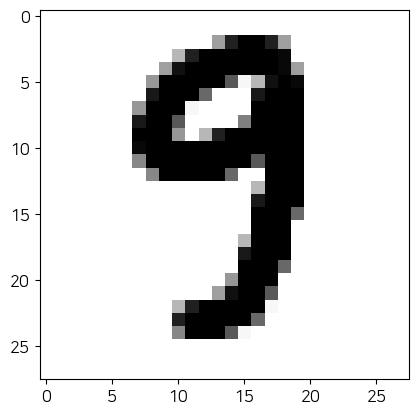

In [49]:
for path in glob.glob('./mnist/*.png'):
    # print(path)
    img = Image.open(path).convert('L')
    # print(img)
    plt.imshow(img,cmap='gray')
    img_result = np.resize(img,(1,784))
    # print(img_result)
    img_result = 255-img_result
    # print(img_result)
    # img_result = np.resize(img_result,(28,28))
    # plt.imshow(img_result,cmap='gray')
    pred = clf.predict(img_result)
    print(pred)
    plt.show()

In [50]:
import pickle

In [51]:
f = open('mnist.model','wb')
pickle.dump(clf,f)
f.close()

In [52]:
f = open('mnist.model','rb')
model = pickle.load(f)
f.close()

['0']


C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


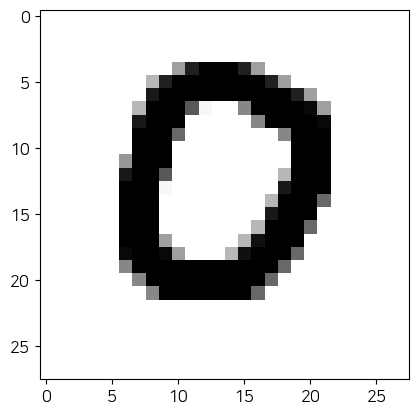

['1']


C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


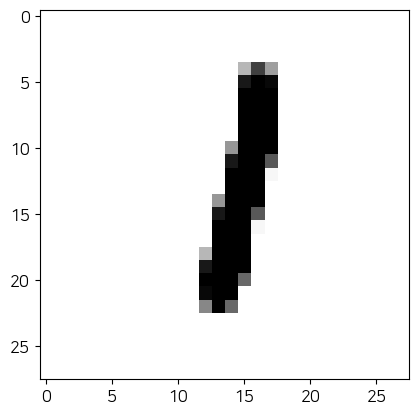

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['2']


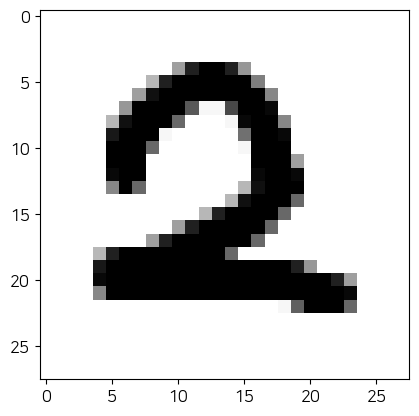

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['3']


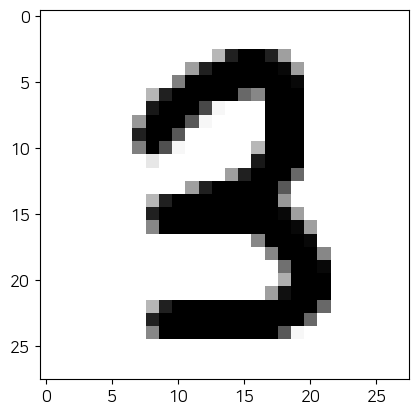

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['4']


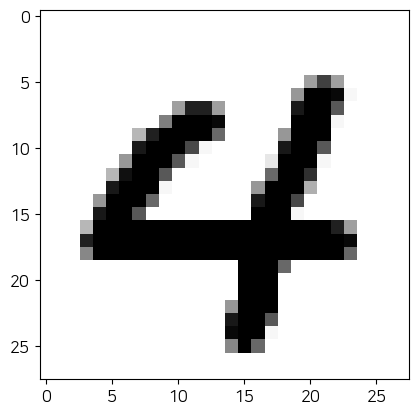

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['5']


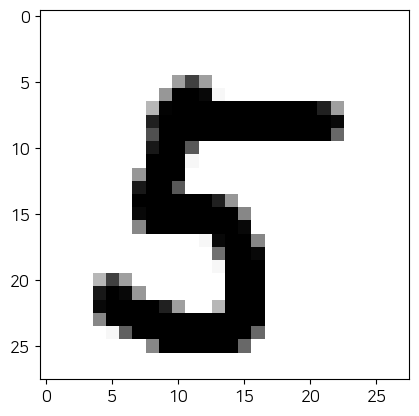

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['5']


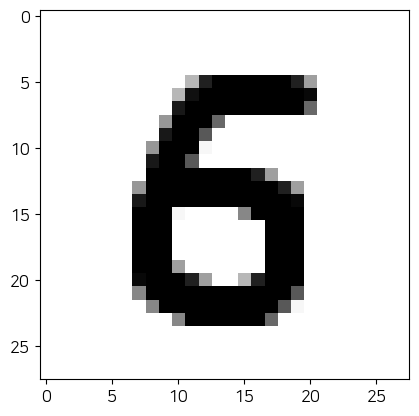

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['7']


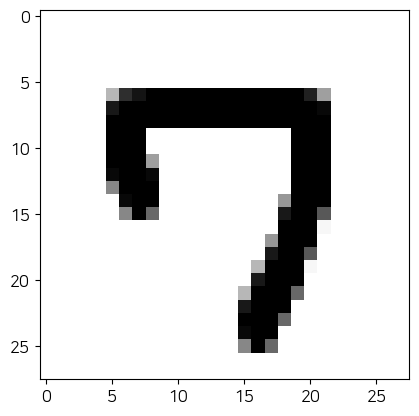

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['3']


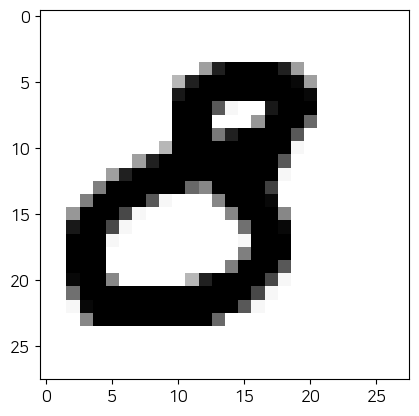

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['3']


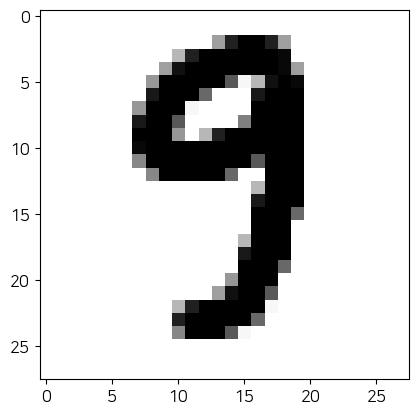

In [53]:
for path in glob.glob('./mnist/*.png'):
    img = Image.open(path).convert('L')
    plt.imshow(img,cmap='gray')
    img_result = np.resize(img,(1,784))
    img_result = 255-img_result
    pred = model.predict(img_result)
    print(pred)
    plt.show()